In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
theoretical = np.fromfile('initial_pk_linear_theo.data', dtype=np.double)
spec = [None]*11
for i in range(11):
	spec[i] = np.zeros(len(theoretical))
	for b in range(50):
		realisation = np.fromfile('Data/' + str(b) + 'spec' + str(i * 100) + '.data', dtype=np.double)
		for s in range(len(realisation)):
			spec[i][s] += realisation[s]
	spec[i] = spec[i] / 50

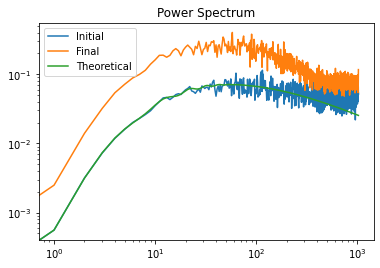

In [5]:
initial = spec[0]
final = spec[-1]
initial[0] = 0.0
final[0] = 0.0
plt.figure()
plt.title('Power Spectrum')
plt.loglog(initial, label='Initial')
plt.loglog(final, label='Final')
plt.loglog(theoretical, label='Theoretical')
plt.legend()
plt.savefig('single.png')
plt.show()